In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
train=pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [93]:
train.head(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [96]:
train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [97]:
test.isnull().sum()

id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

In [98]:
train.shape

(750000, 10)

In [99]:
train.dtypes  

id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [100]:
train.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [101]:
for col in train:
    print(col)
    print(train[col].value_counts())

id
id
749999    1
0         1
1         1
2         1
3         1
         ..
19        1
20        1
21        1
22        1
23        1
Name: count, Length: 750000, dtype: int64
Temparature
Temparature
27    55228
35    54855
32    54656
30    53867
34    53788
38    53743
36    53725
26    53310
29    53198
33    53178
31    52924
25    52876
28    52431
37    52221
Name: count, dtype: int64
Humidity
Humidity
70    33745
53    33640
62    33617
71    33525
64    33446
52    33220
66    33197
67    33132
72    33027
61    32771
60    32596
65    32541
51    32530
55    32405
68    32388
57    32342
54    32246
56    31997
50    31946
59    31843
63    31674
69    31371
58    30801
Name: count, dtype: int64
Moisture
Moisture
61    19809
48    19386
47    19299
53    19270
46    19180
39    19163
51    19155
58    18867
45    18864
34    18829
52    18791
62    18748
64    18745
43    18700
33    18676
37    18604
57    18585
65    18450
60    18433
35    18290
54    18264
38    18243


In [102]:
train_encoded = pd.get_dummies(train, columns=['Soil Type','Crop Type'])

In [103]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,37,70,36,36,4,5,28-28,False,True,...,False,False,False,False,False,False,False,True,False,False
1,1,27,69,65,30,6,18,28-28,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,29,63,32,24,12,16,17-17-17,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,35,62,54,39,12,4,10-26-26,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,35,58,43,37,2,16,DAP,False,False,...,False,False,False,False,False,True,False,False,False,False


In [104]:
train_encoded.shape

(750000, 24)

In [106]:
train_encoded['N_P_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Phosphorous'] + 1)
train_encoded['N_K_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Potassium'] + 1)
train_encoded['P_K_ratio'] = train_encoded['Phosphorous'] / (train_encoded['Potassium'] + 1)
train_encoded['Temp_Moisture'] = train_encoded['Temparature'] / (train_encoded['Moisture'] + 1)

In [107]:
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 
                'Nitrogen', 'Phosphorous', 'Potassium', 
                'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Temp_Moisture']

for col in numeric_cols:
    min_val = train_encoded[col].min()
    max_val = train_encoded[col].max()
    train_encoded[col] = (train_encoded[col] - min_val) / (max_val - min_val)

In [108]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,28-28,False,True,...,False,False,False,True,False,False,0.752520,0.695652,0.098344,0.723982
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,28-28,False,False,...,False,False,False,False,False,False,0.478947,0.520000,0.325714,0.076923
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,17-17-17,False,False,...,False,False,False,False,False,False,0.381125,0.322581,0.233487,0.261866
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,10-26-26,False,False,...,False,False,False,False,False,False,0.840961,0.564516,0.058372,0.445931
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,DAP,False,False,...,False,True,False,False,False,False,0.628857,0.785714,0.344671,0.530504


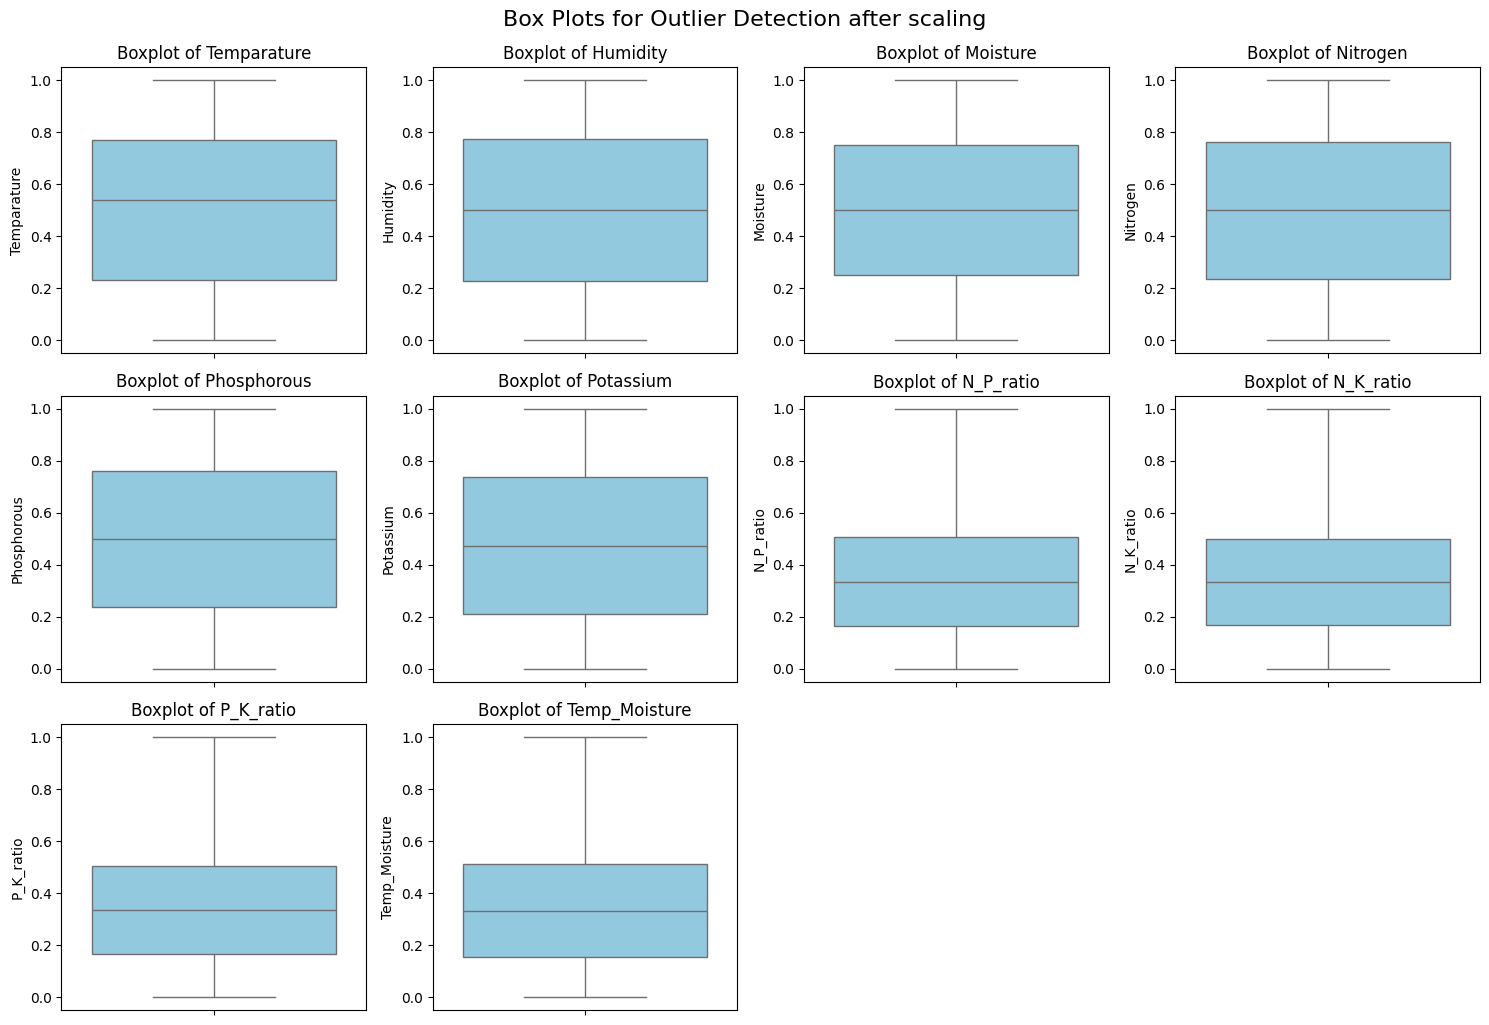

In [116]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection after scaling", fontsize=16, y=1.02)
plt.show()

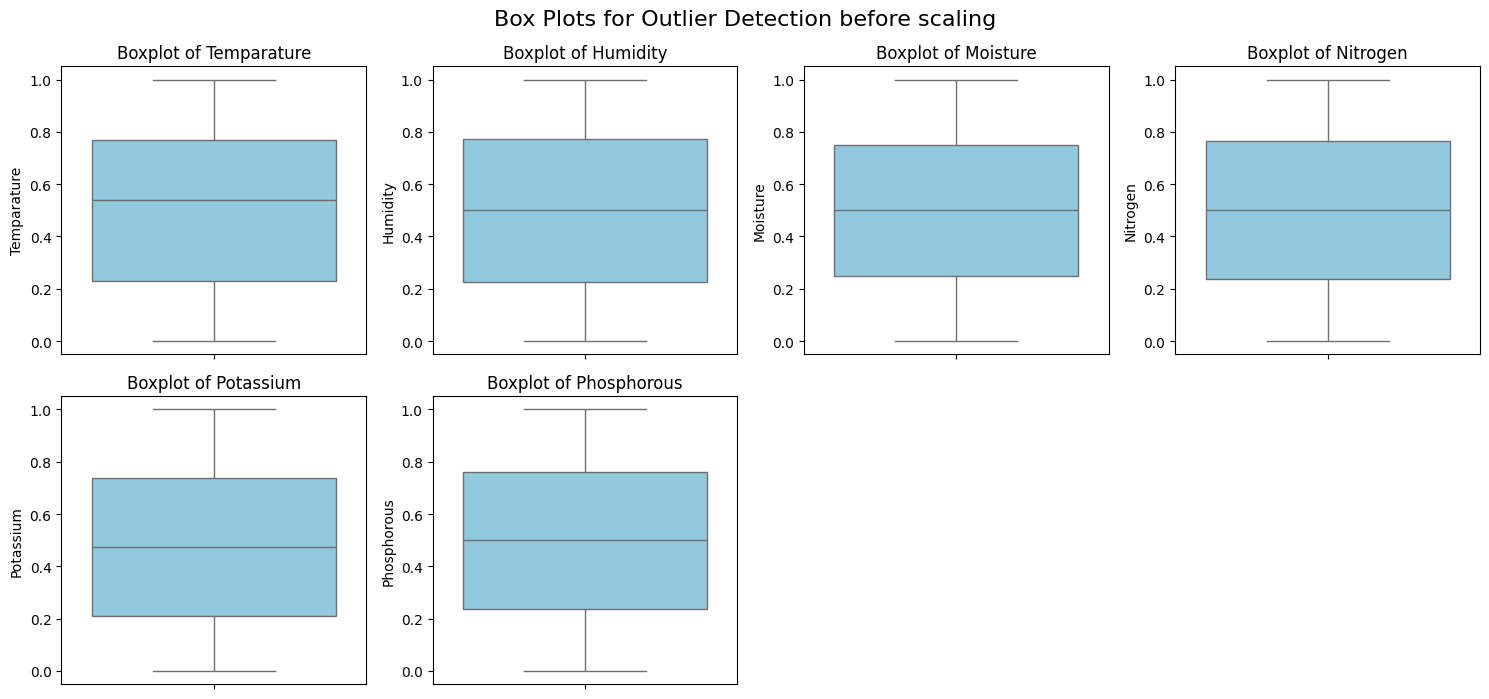

In [117]:
numeric_cols_train=['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_train):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection before scaling", fontsize=16, y=1.02)
plt.show()